<a href="https://colab.research.google.com/github/RamadeviKN/MachineLearning_with_Python/blob/main/multiple_lr_sample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
raw_data = pd.read_csv('Insurance.csv')
raw_data.describe(include='all')

,Age,Sex,BMI,Smoker,Region,Insurance Charges
count,1338.000000,1338,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,2,4,NaN
top,NaN,male,NaN,no,southeast,NaN
freq,NaN,676,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,NaN,NaN,16639.912515


In [3]:
raw_data.isnull().sum()

,0
Age,0
Sex,0
BMI,0
Smoker,0
Region,0
Insurance Charges,0


In [4]:
q = raw_data['Insurance Charges'].quantile(0.99)
data_no_outliers = raw_data[raw_data['Insurance Charges']<q]
data_no_outliers.describe(include='all')

,Age,Sex,BMI,Smoker,Region,Insurance Charges
count,1324.000000,1324,1324.000000,1324,1324,1324.000000
unique,NaN,2,NaN,2,4,NaN
top,NaN,male,NaN,no,southeast,NaN
freq,NaN,667,NaN,1064,357,NaN
mean,39.089879,NaN,30.585400,NaN,NaN,12847.275434
std,14.025792,NaN,6.067911,NaN,NaN,11435.272603
min,18.000000,NaN,15.960000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,NaN,NaN,4710.601913
50%,39.000000,NaN,30.275000,NaN,NaN,9283.021300
75%,51.000000,NaN,34.443750,NaN,NaN,16073.095438


In [5]:
data_with_dummies = pd.get_dummies(data_no_outliers, drop_first=True)
data_with_dummies.columns.values

array(['Age', 'BMI', 'Insurance Charges', 'Sex_male', 'Smoker_yes',
       'Region_northwest', 'Region_southeast', 'Region_southwest'],
      dtype=object)

In [6]:
cols = ['Insurance Charges', 'Age', 'BMI', 'Sex_male', 'Smoker_yes',
       'Region_northwest', 'Region_southeast', 'Region_southwest']

In [7]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Insurance Charges,Age,BMI,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,16884.92400,19,27.900,False,True,False,False,True
1,1725.55230,18,33.770,True,False,False,True,False
2,4449.46200,28,33.000,True,False,False,True,False
3,21984.47061,33,22.705,True,False,True,False,False
4,3866.85520,32,28.880,True,False,True,False,False


In [8]:
targets = data_preprocessed['Insurance Charges']
inputs = data_preprocessed.drop(['Insurance Charges'],axis=1)
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [9]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [10]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [11]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

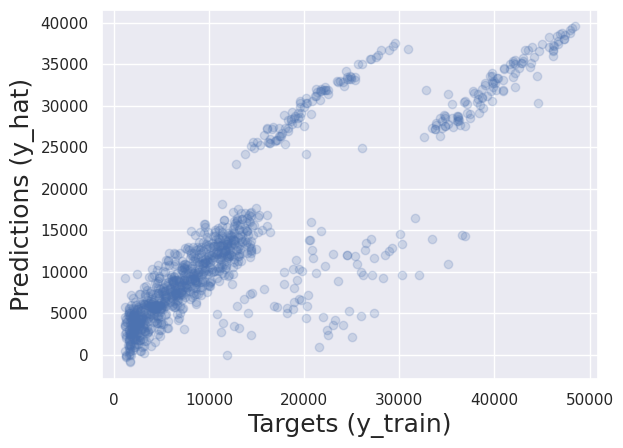

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(y_train, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

In [14]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.7482819544393273